In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

Steps:

1. First, need to consolidate all reporting into a similar format.
2. 2016 is especially aggregious. Should update all reporting to match, as close as possible, to the 2023 data.
3. Column headers:
- Level
- District Code
- District Name
- School Code
- School Name
- Content (should be 'Mathematics')
- Grade (Might need to slim this down)
- Number of Total Records (may not need this)
- Number of Valid Scores (May not need this)
- Number of No Scores
- Participation Rate (2023, but should have it for each year)
- Participation Rate 2022 (nice for comparison)
- Participation Rate 2019 (not sure why 2021 was skipped)
- Mean Scale Score
- Standard Deviation
- Number Did Not Yet Meet Expectations
- Percent Did Not Yet Meet Expectations
- Number Partially Met Expectations
- Number Approached Expectations
- Percent Approacted Expectations
- Number Met Expectations
- Percent Met Expectations
- Number Exceeded Expectations
- Percent Exceeded Expectations
- Number Met or Exceeded Expectations
- 2023 (% Met or Exceeded Expectations)
- 2022
- 2019
- Change 2023-2022
- Congressional District

Notes:
- Focusing on Mathematics: All Grades, 03, 04, 05, 06, 07, 08
- Can remove all ELA rows and SLA rows
        

In [42]:
## Not all school codes are 4 digits, so this takes any digit under four and appends 00s to the front as needed
def fourDigitSchoolCode(code):
    codeString = str(code)
    fill = '0000'
    if (len(codeString) == 4):
        return codeString
    return fill[0 : (4 - len(codeString))] + codeString

In [43]:
## Web scraper to get financial information for 2023. This includes the current school spending
## and the price per student
def getPricePerStudent(districtCode, schoolCode):
    # Note, historic data to 2019 exists at https://www.cde.state.co.us/schoolview/financialtransparency/historical/{district}/{school}
    baseUrl = 'https://www.cde.state.co.us/schoolview/financialtransparency/organizations/'
    codeDistrict = fourDigitSchoolCode(districtCode)
    codeSchool = fourDigitSchoolCode(schoolCode)
    page = requests.get(baseUrl + codeDistrict + '/' + codeSchool)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="maincontent")
    ## This is the span that includes the price per student value
    pricePerStudent = float(results.find("span", style="font-size: 2.5rem; font-weight: 700; line-height: 1;").text.replace('$','').replace(',',''))
    currentSchoolSpending = float(results.find("div", class_="dataPoint dataPoint_stacked dataPoint_large").find("div", class_="dataPoint-value").text.replace('$','').replace(',',''))
    print(districtCode)
    return { pricePerStudent, currentSchoolSpending }

In [44]:
## Update the more recent reports to the same format
Results_2023 = pd.read_csv('2023 CMAS ELA and Math District and School Summary Achievement Results.csv', sep=",", header=0)
## Now remove all the rows where content !== "Mathematics"
## and only loking at the school level
Results_2023 = Results_2023[(Results_2023['Level'] == 'SCHOOL') & (Results_2023['Content'] == 'Mathematics') & (Results_2023['Grade'] == 'All Grades')]
## Now let's just get the columns we want, which should be:
## District Code, District Name, School Code, School Name, All Grades, 3, 4, 5, 6, 7, 8, Mean Scale Score, Standard Deviation, % Met Expectations
Results_2023 = Results_2023[['District Code', 'District Name', 'School Code', 'School Name', 'Grade', 'Mean Scale Score', 'Standard Deviation', 'Percent Met Expectations']]
## df[['a','d']]
# def generateNewTable(dataframe):
#     columns = ['District Code', 'District Name', 'School Code', 'School Name', 'All Grades', '3', '4', '5', '6', '7', '8', 'Mean Scale Score', 'Standard Deviation', 'Percent Met Expectations']
#     row = []
#     for index, row in dataframe.iterrows():
#         print(index)
#     newDataFrame = pd.DataFrame([], columns=columns)
#     return newDataFrame

## Now add two new columns by getting the financial information
# Results_2023['Price Per Student'] = Results_2023.apply(lambda x: getPricePerStudent(x['District Code'], x['School Code']), axis=1)
# newStuff = Results_2023.apply(lambda x: getPricePerStudent(x['District Code'], x['School Code']), axis=1)
# print(newStuff)
# Results_2023['Price Per Student'] = getPricePerStudent(Results_2023['District Code'], Results_2023['School Code'])
# Results_2023.to_csv('testing_this.csv')
# print(generateNewTable(Results_2023))

In [9]:
## Update the more recent reports to the same format
Results_2023 = pd.read_csv('2023 CMAS ELA and Math District and School Summary Achievement Results.csv', sep=",", header=0)
## Now remove all the rows where content !== "Mathematics"
## and only loking at the school level
Results_2023 = Results_2023[(Results_2023['Level'] == 'SCHOOL') & (Results_2023['Content'] == 'Mathematics') & (Results_2023['Grade'] == 'All Grades')]
## Now let's just get the columns we want, which should be:
## District Code, District Name, School Code, School Name, All Grades, 3, 4, 5, 6, 7, 8, Mean Scale Score, Standard Deviation, % Met Expectations
Results_2023 = Results_2023[['District Code', 'District Name', 'School Code', 'School Name', 'Grade', 'Mean Scale Score', 'Standard Deviation', 'Percent Met Expectations']]
Results_2023.to_csv('testing_this.csv')

729.0


Text(0.5, 1.0, 'Score for Colorado Schools in 2023')

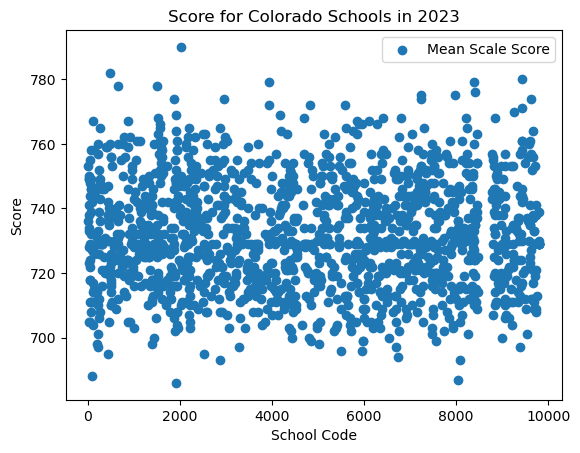

In [49]:
import matplotlib.pyplot as plt

mean_scale_score_median = Results_2023['Mean Scale Score'].replace('- -', '0').astype('float').median()
print(mean_scale_score_median)

def make_a_float(dataItem):
    # check the data type. If a string, remove the dollar sign
    # and any N/As
    if type(dataItem) is str:
        return(dataItem.replace('- -',str(mean_scale_score_median)))
    return(dataItem)

mean_scale_score = Results_2023['Mean Scale Score'].apply(make_a_float).astype('float')

# High vs. Low
plt.scatter(Results_2023['School Code'], mean_scale_score, label="Mean Scale Score")
# plt.plot(Results_2023['School Code'], met_expect, label="% Met Expectations")
plt.xlabel('School Code')
plt.ylabel('Score')
plt.legend()
plt.title('Score for Colorado Schools in 2023')

16.35
62.5


Text(0.5, 1.0, '% Met Exceptation for Colorado Schools in 2023')

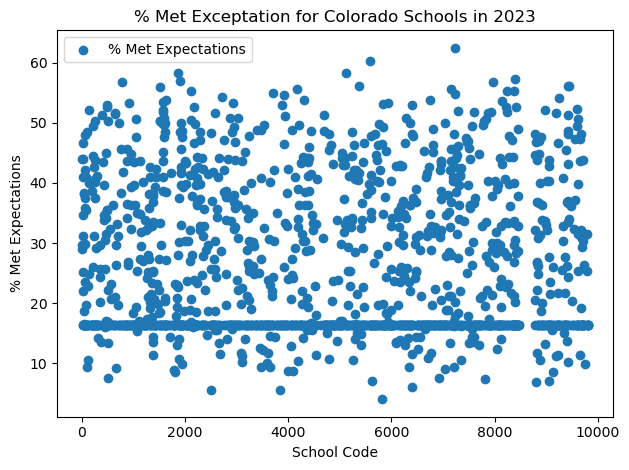

In [125]:
met_expect_median = Results_2023['Percent Met Expectations'].replace('- -', '0').astype('float').median()
print(met_expect_median)

def make_a_float(dataItem):
    if type(dataItem) is str:
        return(dataItem.replace('- -',str(met_expect_median)))
    return(dataItem)

met_expect = Results_2023['Percent Met Expectations'].apply(make_a_float).astype('float')

# High vs. Low
plt.scatter(Results_2023['School Code'], met_expect, label="% Met Expectations")
plt.xlabel('School Code')
plt.ylabel('% Met Expectations')
plt.legend()
plt.title('% Met Exceptation for Colorado Schools in 2023')

In [91]:
## Adds the pricing data to the dataframe, which is cool
def splitBudget(price):
    return price.split(',')[1].split(']')[0]

def splitPricePerStudent(price):
    return price.split(',')[0].split('[')[1]

## Lets make sure the pricing data is the same length
# print(len(Results_2023.index))
price = pd.read_csv('Pricing_2023.csv')
price.columns = ['Idx', 'PPS']
price['Budget'] = price.apply(lambda x: splitBudget(x['PPS']), axis=1).astype('float')
price['Price Per Student'] = price.apply(lambda x: splitPricePerStudent(x['PPS']), axis=1).astype('float')
price = price.drop('Idx', axis=1)
price = price.drop('PPS', axis=1)
Results_2023.index = pd.RangeIndex(len(Results_2023.index))
Results_2023['Price Per Student'] = price['Price Per Student']
Results_2023['Budget'] = price['Budget']
print(Results_2023)

      District Code                 District Name  School Code  \
0                10                    Mapleton 1          187   
1                10                    Mapleton 1          501   
2                10                    Mapleton 1          502   
3                10                    Mapleton 1          503   
4                10                    Mapleton 1          504   
...             ...                           ...          ...   
1513           9170  Education reEnvisioned BOCES         1007   
1514           9170  Education reEnvisioned BOCES         1448   
1515           9170  Education reEnvisioned BOCES         1501   
1516           9170  Education reEnvisioned BOCES         1892   
1517           9170  Education reEnvisioned BOCES         7497   

                                         School Name       Grade  \
0          Mapleton Expeditionary School of the Arts  All Grades   
1                          Monterey Community School  All Grades   
2  

oh yeah
oh yeah
oh yeah
oh yeah
oh yeah
oh yeah
oh yeah


Text(0.5, 1.0, 'Cost Per Student for Colorado Schools in 2023')

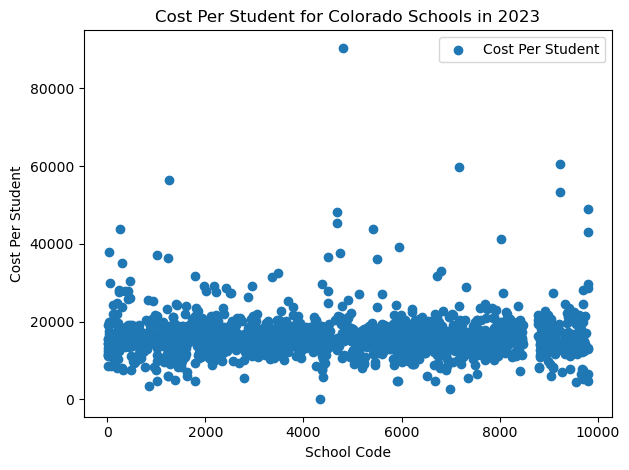

In [116]:
met_expect_median = Results_2023['Price Per Student'].median()
# print(met_expect_median)

def make_a_float(dataItem):
    if (dataItem == 0.0):
        print('oh yeah')
        return met_expect_median
    return dataItem

cost = Results_2023['Price Per Student'].apply(make_a_float)

# High vs. Low
plt.scatter(Results_2023['School Code'], cost, label="Cost Per Student")
plt.xlabel('School Code')
plt.ylabel('Cost Per Student')
plt.legend()
plt.title('Cost Per Student for Colorado Schools in 2023')

In [98]:
print(Results_2023['Price Per Student'].std())

5569.661806948758


In [100]:
print(Results_2023['Mean Scale Score'].replace('- -', '0').astype('float').std())

165.38673503720534


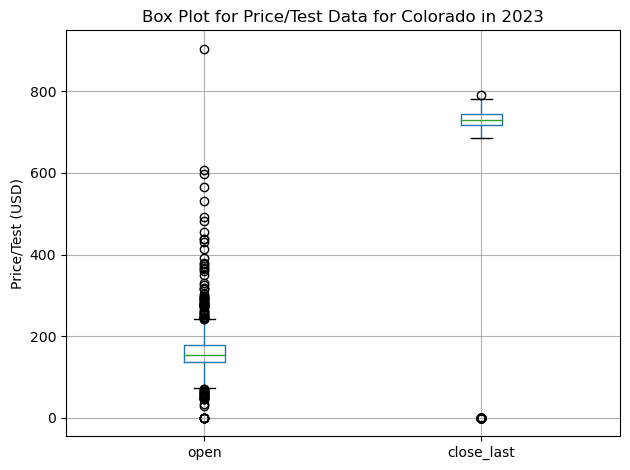

In [105]:
# Box Plot
price_attribute = Results_2023['Price Per Student'].div(100)
test_attribute = Results_2023['Mean Scale Score'].replace('- -', '0').astype('float')
plt.rcParams["figure.autolayout"] = True
df = pd.DataFrame(dict(open=price_attribute, close_last=test_attribute))
df.boxplot()
plt.ylabel('Price/Test (USD)')
plt.title('Box Plot for Price/Test Data for Colorado in 2023')
plt.show()

(array([6.300e+01, 1.109e+03, 2.980e+02, 3.000e+01, 1.000e+01, 4.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.60000e+01, 9.08490e+03, 1.81238e+04, 2.71627e+04, 3.62016e+04,
        4.52405e+04, 5.42794e+04, 6.33183e+04, 7.23572e+04, 8.13961e+04,
        9.04350e+04]),
 <BarContainer object of 10 artists>)

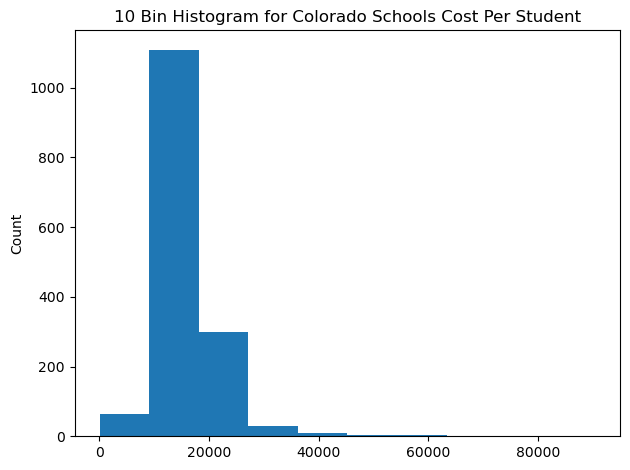

In [119]:
# 10 bin histogram of Volume
met_expect_median = Results_2023['Price Per Student'].median()
# print(met_expect_median)

def make_a_float(dataItem):
    if (dataItem == 0.0):
        return met_expect_median
    return dataItem

cost = Results_2023['Price Per Student'].apply(make_a_float)

plt.ylabel('Count')
plt.title('10 Bin Histogram for Colorado Schools Cost Per Student')
plt.hist(cost, bins=10)

In [127]:
def correlation ( attribute1 , fileName1 , attribute2, fileName2 ):
    # Read in the two files
    fOne = pd.read_csv(fileName1, sep=",")
    fTwo = pd.read_csv(fileName2, sep=",")
    # Clean up the data to ensure all options are redefined as floats
    fOneClean = fOne[attribute1].apply(make_a_float).astype('float')
    fTwoClean = fTwo[attribute2].apply(make_a_float).astype('float')
    # Calculate the correlation coefficient
    return fOneClean.corr(fTwoClean, 'pearson')

def make_a_float(dataItem):
    # check the data type. If a string, remove the dollar sign
    # and any N/As
    if type(dataItem) is str:
        return(dataItem.replace('- -',str(mean_scale_score_median)))
    return(dataItem)

mean_scale_score = Results_2023['Mean Scale Score'].apply(make_a_float).astype('float')

print(Results_2023['Price Per Student'].corr(mean_scale_score, 'pearson'))
print(mean_scale_score.corr(Results_2023['Price Per Student'], 'pearson'))

-0.183669159920093
-0.183669159920093
